In [25]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
from bokeh.palettes import Category20

Category20 = Category20[20]

In [26]:
data_dir = os.path.join(os.getcwd(), "..", "test", "benchmarking", "data")

def load_benchmark_csv(label):
    data = np.loadtxt(os.path.join(data_dir, label+".csv"), delimiter=",")
    return data


In [27]:
to_extrapolate = True
model_x_max = 1e7#2**15
model_pts = 1000

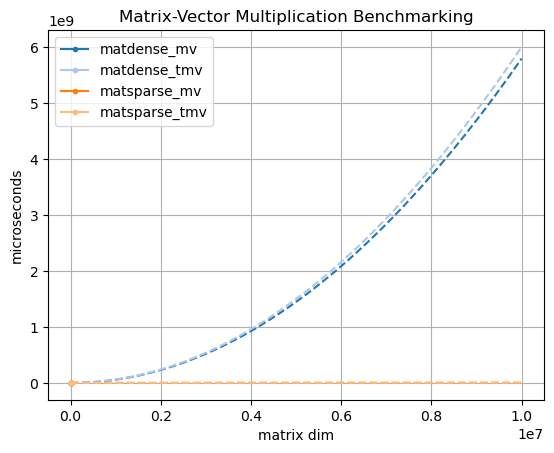

In [28]:
fig, ax = plt.subplots()

color_cnt = 0

for file_label in ["matdense_mv", "matdense_tmv"]:

    data = load_benchmark_csv(file_label)
    data_x = data[:, 0]
    data_y = data[:, 1]
    ax.plot(data_x, data_y, ".-", label=file_label, color=Category20[color_cnt])

    if (to_extrapolate):
        params = np.polyfit(data_x, data_y, deg=2)
        model_x = np.linspace(data_x[-1], model_x_max, model_pts)
        model_y = params[2] + params[1]*model_x + params[0]*model_x*model_x
        ax.plot(model_x, model_y, "--", color=Category20[color_cnt])

    color_cnt += 1

for file_label in ["matsparse_mv", "matsparse_tmv"]:

    data = load_benchmark_csv(file_label)
    data_x = data[:, 0]
    data_y = data[:, 1]
    ax.plot(data_x, data_y, ".-", label=file_label, color=Category20[color_cnt])

    if (to_extrapolate):
        params = np.polyfit(data_x, data_y, deg=1)
        model_x = np.linspace(data_x[-1], model_x_max, model_pts)
        model_y = params[1] + params[0]*model_x
        ax.plot(model_x, model_y, "--", color=Category20[color_cnt])

    color_cnt += 1

ax.grid()
ax.legend()
ax.set_xlabel("matrix dim")
ax.set_ylabel("microseconds")
ax.set_title("Matrix-Vector Multiplication Benchmarking")

plt.show()

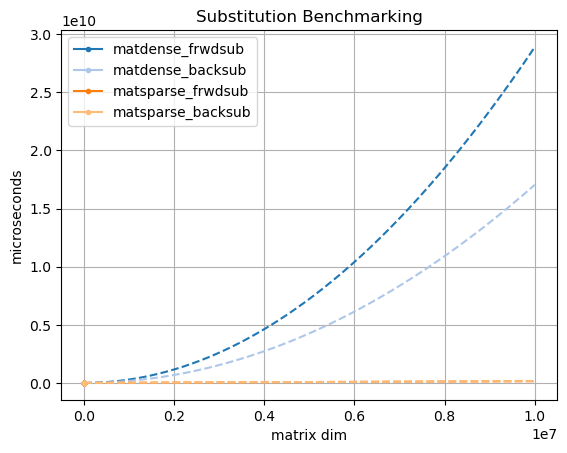

In [29]:
fig, ax = plt.subplots()

color_cnt = 0

for file_label in ["matdense_frwdsub", "matdense_backsub"]:

    data = load_benchmark_csv(file_label)
    data_x = data[:, 0]
    data_y = data[:, 1]
    ax.plot(data_x, data_y, ".-", label=file_label, color=Category20[color_cnt])

    if (to_extrapolate):
        params = np.polyfit(data_x, data_y, deg=2)
        model_x = np.linspace(data_x[-1], model_x_max, model_pts)
        model_y = params[2] + params[1]*model_x + params[0]*model_x*model_x
        ax.plot(model_x, model_y, "--", color=Category20[color_cnt])

    color_cnt += 1

for file_label in ["matsparse_frwdsub", "matsparse_backsub"]:

    data = load_benchmark_csv(file_label)
    data_x = data[:, 0]
    data_y = data[:, 1]
    ax.plot(data_x, data_y, ".-", label=file_label, color=Category20[color_cnt])

    if (to_extrapolate):
        params = np.polyfit(data_x, data_y, deg=1)
        model_x = np.linspace(data_x[-1], model_x_max, model_pts)
        model_y = params[1] + params[0]*model_x
        ax.plot(model_x, model_y, "--", color=Category20[color_cnt])

    color_cnt += 1

ax.grid()
ax.legend()
ax.set_xlabel("matrix dim")
ax.set_ylabel("microseconds")
ax.set_title("Substitution Benchmarking")

plt.show()

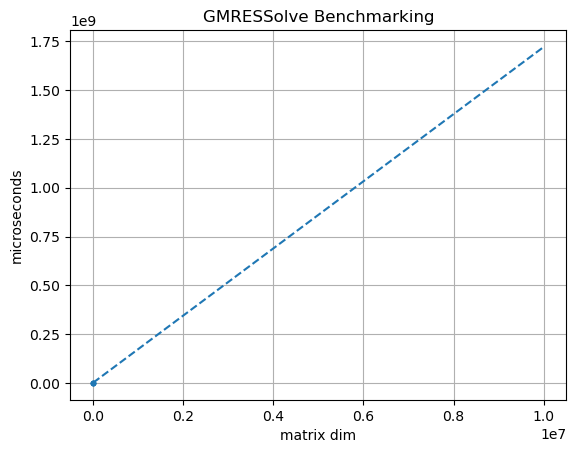

In [30]:
fig, ax = plt.subplots()

color_cnt = 0

data = load_benchmark_csv("gmressolve")
data_x = data[:, 0]
data_y = data[:, 1]
ax.plot(data_x, data_y, ".-", color=Category20[color_cnt])

if (to_extrapolate):
    params = np.polyfit(data_x, data_y, deg=1)
    model_x = np.linspace(data_x[-1], model_x_max, model_pts)
    model_y = params[1] + params[0]*model_x
    ax.plot(model_x, model_y, "--", color=Category20[color_cnt])

ax.grid()
ax.set_xlabel("matrix dim")
ax.set_ylabel("microseconds")
ax.set_title("GMRESSolve Benchmarking")

plt.show()